<a href="https://colab.research.google.com/github/sim-so/HandsOnML/blob/main/05_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 05 서포트 벡터 머신 SVM

In [18]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 선형 SVM 분류

In [19]:
from sklearn.svm import SVC
from sklearn import datasets

In [20]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3 )]        # Petal length, Petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

In [21]:
# bad model for comparison
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

In [22]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=100, facecolors="#FFAAAA")
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

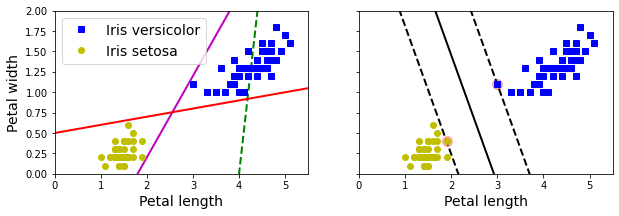

In [23]:
axis = [0, 5.5, 0, 2]
fig, axes = plt.subplots(ncols=2, figsize=(10, 3), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis(axis)

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis(axis)

plt.show()

SVM은 특성의 스케일에 민감한 모델입니다.\
특성의 스케일이 서로 다른 경우, 스케일이 작은 특성은 결정 경계를 정하는 데에 거의 반영되지 않을 수 있습니다.

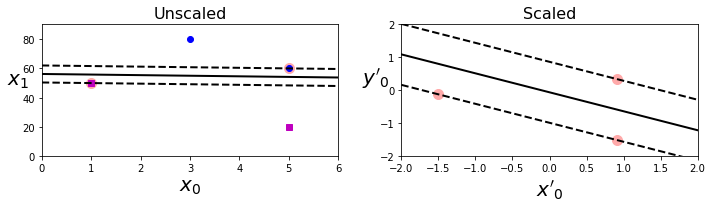

In [24]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 3))
plt.sca(axes[0])
plt.plot(Xs[:, 0][ys == 1], Xs[:, 1][ys == 1], "bo")
plt.plot(Xs[:, 0][ys == 0], Xs[:, 1][ys == 0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.sca(axes[1])
plt.plot(X_scaled[:, 0][ys == 1], Xs[:, 1][ys == 1], "bo")
plt.plot(X_scaled[:, 0][ys == 0], Xs[:, 1][ys == 0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$y'_0$", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])
plt.tight_layout()
plt.show()

### 1-1. 소프트 마진 분류
하드 마진은 선형적으로 구분되는 데이터에서만 제대로 작동이 가능하며, 이상치에 민감합니다.\
이상치가 있는 경우 최대 마진을 갖는 결정 경계를 찾기 어렵기 때문입니다.


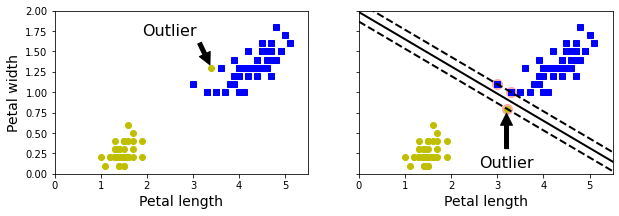

In [25]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

axis = [0, 5.5, 0, 2]
fig, axes = plt.subplots(ncols=2, figsize=(10, 3), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1 == 1], Xo1[:, 1][yo1 == 1], "bs")
plt.plot(Xo1[:, 0][yo1 == 0], Xo1[:, 1][yo1 == 0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor="black", shrink=0.1),
             fontsize=16
             )
plt.axis(axis)

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2 == 1], Xo1[:, 1][yo2 == 1], "bs")
plt.plot(Xo2[:, 0][yo2 == 0], Xo2[:, 1][yo2 == 0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor="black", shrink=0.1),
             fontsize=16
             )
plt.axis(axis)

plt.show()

샘플에 이상치가 있는 경우 소프트 마진 분류를 사용할 수 있습니다.\
일부 오류를 감안하면서 마진을 가능한 넓게 유지하는 방법입니다.

In [26]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [27]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]                         # Petal_length, Petal_width
y = (iris["target"] == 2).astype(np.float64)        # Iris-Virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [28]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

여기서 "hinge"는 마진 안으로 들어오는 샘플에 대해 적용할 손실 함수입니다.\
"C"가 낮을수록 마진이 넓은 대신 오류를 더 많이 허용하고,\
높을수록 오류를 적게 허용하는 대신 마진이 좁아집니다.

In [29]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=33)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=33)

scaled_svm_clf1 = Pipeline([
    ("scaler", scaler),
    ("linear_svc", svm_clf1),
])
scaled_svm_clf2 = Pipeline([
    ("scaler", scaler),
    ("linear_svc", svm_clf2),
])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=33))])

In [30]:
# convert parameters' scale to the original
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# get support vectors
# : LinearSVC in liblinear does not save support vectors
t = y * 2 - 1
support_vectors_idx1 = (t * X.dot(w1) + b1 < 1).ravel()
support_vectors_idx2 = (t * X.dot(w2) + b2 < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

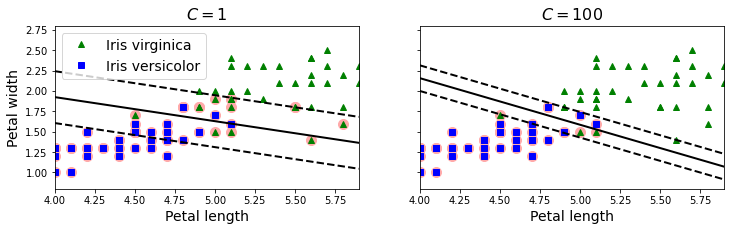

In [32]:
axis = [4, 5.9, 0.8, 2.8]
fig, axes = plt.subplots(ncols=2, figsize=(12, 3), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis(axis)

plt.sca(axes[1])
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis(axis)

plt.show()

## 2. 비선형 SVM 분류
SVM은 기본적으로 선형으로만 분류할 수 있지만, \
복잡한 데이터셋에 대해서는 차원을 추가하여 분류를 수행할 수 있습니다.

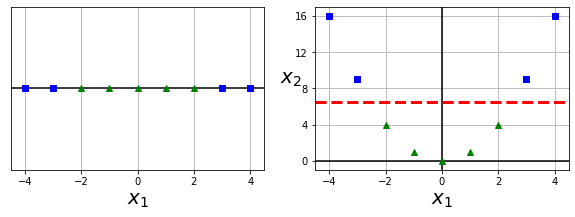

In [35]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

fig, axes = plt.subplots(ncols=2, figsize=(10, 3))

plt.sca(axes[0])
plt.grid(True, which="both")
plt.axhline(y=0, color="k")
plt.plot(X1D[:, 0][y == 0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y == 1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.sca(axes[1])
plt.grid(True, which="both")
plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")
plt.plot(X2D[:, 0][y == 0], X2D[:, 1][y == 0], "bs")
plt.plot(X2D[:, 0][y == 1], X2D[:, 1][y == 1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.show()

아래와 같이 선형으로 분류가 어려운 데이터에 kernel을 적용하여 분류를 수행할 수 있음을 볼 수 있습니다.

In [33]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X, y = make_moons(n_samples=100, noise=0.15)

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [ ]:
X.shape

(100, 2)

In [ ]:
X.min(axis=0), X.max(axis=0)

(array([-1.13526003, -0.6901764 ]), array([2.19387896, 1.11426813]))

In [ ]:
def plot_dataset(X, y, axis):
    plt.plot(X[y==0, 0], X[y==0, 1], "bs")
    plt.plot(X[y==1, 0], X[y==1, 1], "go")
    plt.axis(axis)
    plt.xlabel("x0")
    plt.ylabel("x1")

def plot_predictions(clf, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], 100),
        np.linspace(axis[2], axis[3], 100)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_new_pred = clf.predict(X_new).reshape(x0.shape)
    y_new_decision = clf.decision_function(X_new).reshape(x0.shape)

    plt.contourf(x0, x1, y_new_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_new_decision, cmap=plt.cm.brg, alpha=0.1)

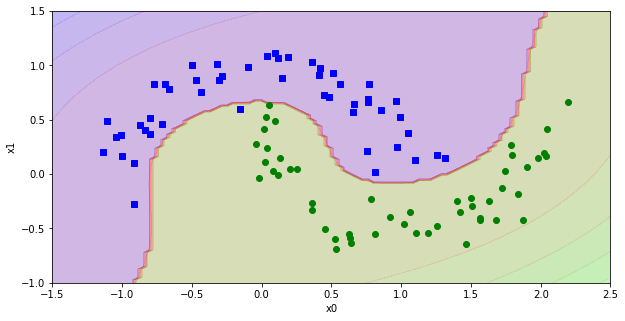

In [ ]:
axis = [-1.5, 2.5, -1, 1.5]

plt.figure(figsize=(10, 5))
plot_predictions(polynomial_svm_clf, axis)
plot_dataset(X, y, axis)
plt.show()

### 2-1. 다항식 커널

In [ ]:
from sklearn.svm import SVC

poly_kernel_svm_clf_3 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf_3.fit(X, y)

poly_kernel_svm_clf_1000 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])
poly_kernel_svm_clf_1000.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

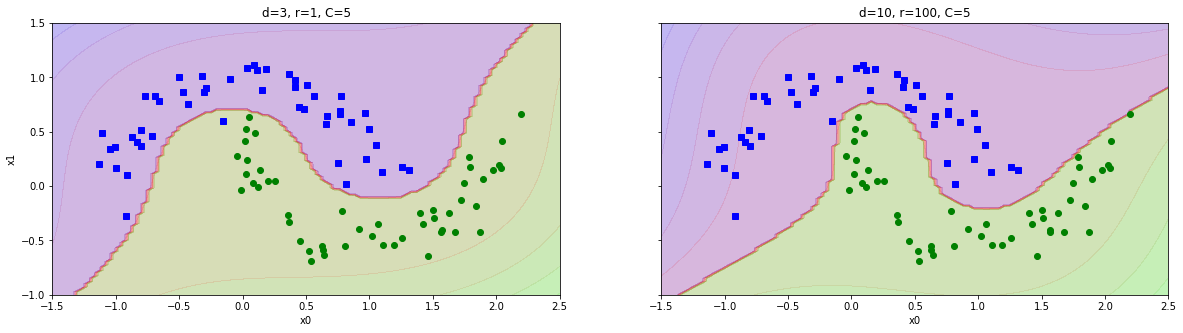

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf_3, axis)
plot_dataset(X, y, axis)
plt.title("d=3, r=1, C=5")

plt.sca(axes[1])
plot_predictions(poly_kernel_svm_clf_1000, axis)
plot_dataset(X, y, axis)
plt.title("d=10, r=100, C=5")
plt.ylabel("")

plt.show()

### 2-2. 유사도 특성

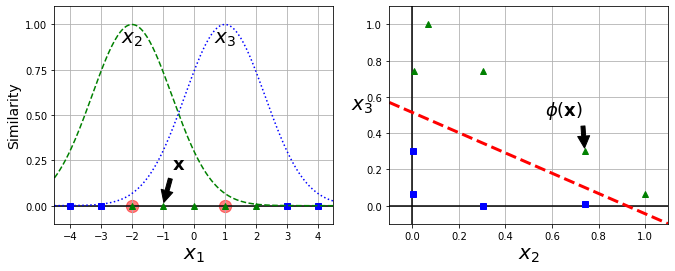

In [37]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

fig, axes = plt.subplots(ncols=2, figsize=(11, 4))

plt.sca(axes[0])
plt.grid(True, which="both")
plt.axhline(y=0, color="k")
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk == 0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk == 1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r"$\mathbf{x}$",
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor="black", shrink=0.1),
             fontsize=18
             )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.sca(axes[1])
plt.grid(True, which="both")
plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")
plt.plot(XK[:, 0][yk == 0], XK[:, 1][yk == 0], "bs")
plt.plot(XK[:, 0][yk == 1], XK[:, 1][yk == 1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$", fontsize=20, rotation=0)
plt.annotate(r"$\phi\left(\mathbf{x}\right)$",
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor="black", shrink=0.1),
             fontsize=18
             )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])

plt.show()

In [38]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


### 2-3. 가우시안 RBF 커널

In [ ]:
rbf_kernel_svm_clf_01_0001 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=0.001))
])
rbf_kernel_svm_clf_01_0001.fit(X, y)

rbf_kernel_svm_clf_01_1000 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=1000))
])
rbf_kernel_svm_clf_01_1000.fit(X, y)

rbf_kernel_svm_clf_5_0001 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf_5_0001.fit(X, y)

rbf_kernel_svm_clf_5_1000 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=1000))
])
rbf_kernel_svm_clf_5_1000.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1000, gamma=5))])

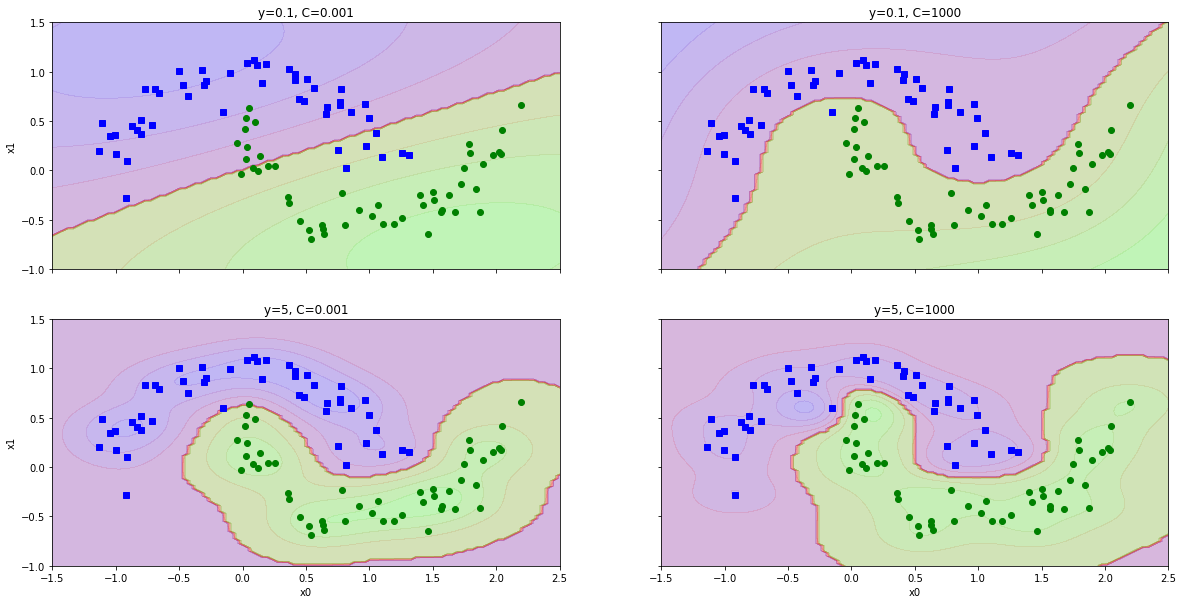

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10), sharex=True, sharey=True)

plt.sca(axes.ravel()[0])
plot_predictions(rbf_kernel_svm_clf_01_0001, axis)
plot_dataset(X, y, axis)
plt.xlabel("")
plt.title("y=0.1, C=0.001")

plt.sca(axes.ravel()[1])
plot_predictions(rbf_kernel_svm_clf_01_1000, axis)
plot_dataset(X, y, axis)
plt.xlabel("")
plt.ylabel("")
plt.title("y=0.1, C=1000")

plt.sca(axes.ravel()[2])
plot_predictions(rbf_kernel_svm_clf_5_0001, axis)
plot_dataset(X, y, axis)
plt.title("y=5, C=0.001")

plt.sca(axes.ravel()[3])
plot_predictions(rbf_kernel_svm_clf_5_1000, axis)
plot_dataset(X, y, axis)
plt.ylabel("")
plt.title("y=5, C=1000")

plt.show()

## 3. SVM 회귀

In [ ]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

In [ ]:
np.random.seed(27)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [ ]:
svm_reg_15 = LinearSVR(epsilon=1.5, random_state=27)
svm_reg_05 = LinearSVR(epsilon=0.5, random_state=27)
svm_reg_15.fit(X, y)
svm_reg_05.fit(X, y)

LinearSVR(epsilon=0.5, random_state=27)

In [ ]:
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg_15.support_ = find_support_vectors(svm_reg_15, X, y)
svm_reg_05.support_ = find_support_vectors(svm_reg_05, X, y) 

In [ ]:
def plot_svm_regression(svm_reg, X, y, axis):
    X_new = np.linspace(axis[0], axis[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(X_new)
    plt.plot(X_new, y_pred, "k-", linewidth=2, label="y_pred")
    plt.plot(X_new, y_pred + svm_reg.epsilon, "k--")
    plt.plot(X_new, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=100, facecolors="#FFAAAA")
    plt.plot(X, y, "bo")
    plt.xlabel("X")
    plt.legend(loc="upper left")
    plt.axis(axis)

In [ ]:
X.min(), X.max()

(0.027259003262006587, 1.9589132642890412)

In [ ]:
y.min(), y.max()

(3.715078275728811, 11.247779207811483)

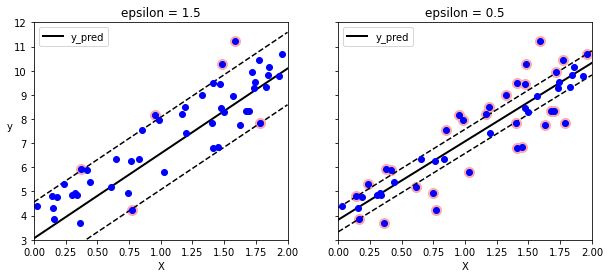

In [ ]:
axis = [0, 2, 3, 12]
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_svm_regression(svm_reg_15, X, y, axis)
plt.title("epsilon = 1.5")
plt.ylabel("y", rotation=0)

plt.sca(axes[1])
plot_svm_regression(svm_reg_05, X, y, axis)
plt.title("epsilon = 0.5")

plt.show()

In [ ]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [ ]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

In [ ]:
svm_poly_reg_100 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg_001 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg_100.fit(X, y)
svm_poly_reg_001.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

In [ ]:
X.min(), X.max()

(-0.9889557657527952, 0.9737738732010346)

In [ ]:
y.min(), y.max()

(0.040441798387431865, 0.8496774525623069)

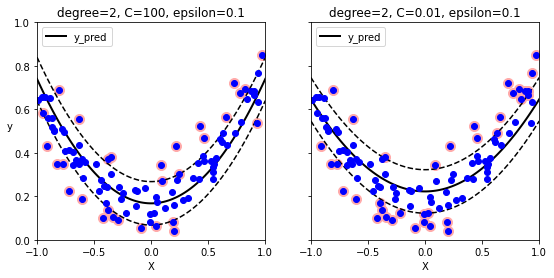

In [ ]:
axis = [-1, 1, 0, 1]
fig, axes = plt.subplots(1, 2, figsize=(9, 4), sharey=True)

plt.sca(axes[0])
plot_svm_regression(svm_poly_reg_100, X, y, axis)
plt.title("degree=2, C=100, epsilon=0.1")
plt.ylabel("y", rotation=0)

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg_001, X, y, axis)
plt.title("degree=2, C=0.01, epsilon=0.1")

plt.show()

## 4. SVM 이론

### 4-1. 결정 함수와 예측

In [39]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]     # Petal length, Petal width
y = (iris["target"] == 2).astype(np.float64)

In [44]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    boundary_x2s = -x1s*(w[0]/w[1]) - b/w[1]
    margin_x2s_1 = -x1s*(w[0]/w[1]) - (b-1)/w[1]
    margin_x2s_2 = -x1s*(w[0]/w[1]) - (b-1)/w[1]
    ax.plot_surface(x1s, x2, np.zeros_like(x1),
                    color="b", alpha=0.2, cstride=100, rstride=100)
    ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0")
    ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h\pm 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
    ax.plot(X_crop[:, 0][y_crop == 1], X_crop[:, 1][y_crop == 1], 0, "g^")
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot(X_crop[:, 0][y_crop == 0], X_crop[:, 1][y_crop == 0], 0, "bs")
    ax.axis(x1_lim + x2_lim)
    ax.text(4.5, 2.5, 3.8, "Decision function $h$", fontsize=16,
            bbox=dict(boxstyle="square",
                      ec="white", fc="white"))
    ax.set_xlabel(r"Petal length", fontsize=16, labelpad=10)
    ax.set_ylabel(r"Petal width", fontsize=16, labelpad=10)
    ax.set_zlabel(r"$h = \mathbf{w}^T \mathbf{x} + b$", fontsize=18, labelpad=5)
    ax.legend(loc="upper left", fontsize=16)

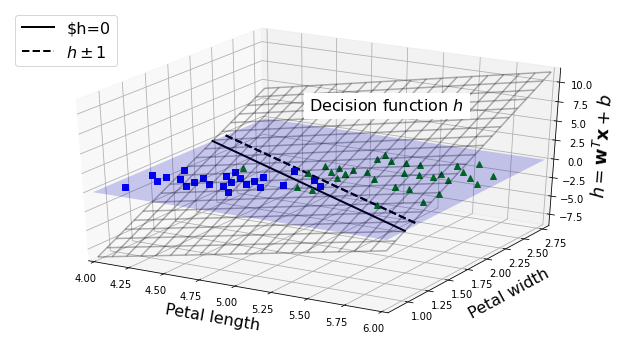

In [45]:
fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])
plt.show()

### 4-2. 목적 함수

In [52]:
def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    plt.plot(x1, y)
    plt.plot(x1_lim, [1, 1], "k:")
    plt.plot(x1_lim, [-1, -1], "k:")
    plt.axhline(y=0, color="k")
    plt.axvline(x=0, color="k")
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, -m], [0, -1], "k--")
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel(r"$x_1$", fontsize=16)
    if ylabel:
        plt.ylabel(r"$w_1 x_1 ", rotation=0, fontsize=16)
    plt.title(r"$w_1 = {}$".format(w), fontsize=16)

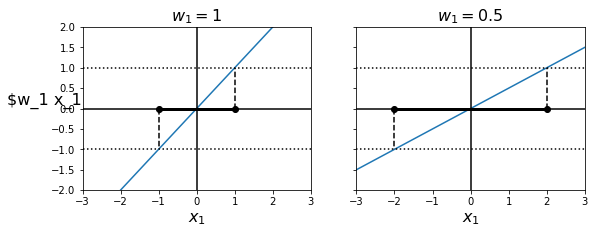

In [53]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 3), sharey=True)

plt.sca(axes[0])
plot_2D_decision_function(1, 0)

plt.sca(axes[1])
plot_2D_decision_function(0.5, 0, ylabel=False)

plt.show()